In [2]:
library(tidyverse)
library(lubridate)
library(cowplot)
theme_set(theme_cowplot())

In [3]:
df = read_csv("data/submssions.csv")

Parsed with column specification:
cols(
  id = col_double(),
  lang = col_character(),
  time = col_character(),
  timestamp = col_double(),
  status_display = col_character(),
  runtime = col_character(),
  url = col_character(),
  is_pending = col_character(),
  title = col_character(),
  memory = col_character(),
  code = col_character(),
  compare_result = col_character()
)



In [4]:
df_unique_ac <- df %>% 
    filter(status_display == "Accepted")  %>% 
    group_by(title) %>% 
    summarize(id = min(id), timestamp=min(timestamp))  %>% 
    ungroup()
head(df_unique_ac)

`summarise()` ungrouping output (override with `.groups` argument)



title,id,timestamp
<chr>,<dbl>,<dbl>
01 Matrix,367831545,1594984015
1-bit and 2-bit Characters,152477881,1525252268
3Sum,145248995,1521111155
4Sum,361549548,1593784481
4Sum II,145394387,1521184468
Add and Search Word - Data structure design,376481512,1596635188


`summarise()` ungrouping output (override with `.groups` argument)



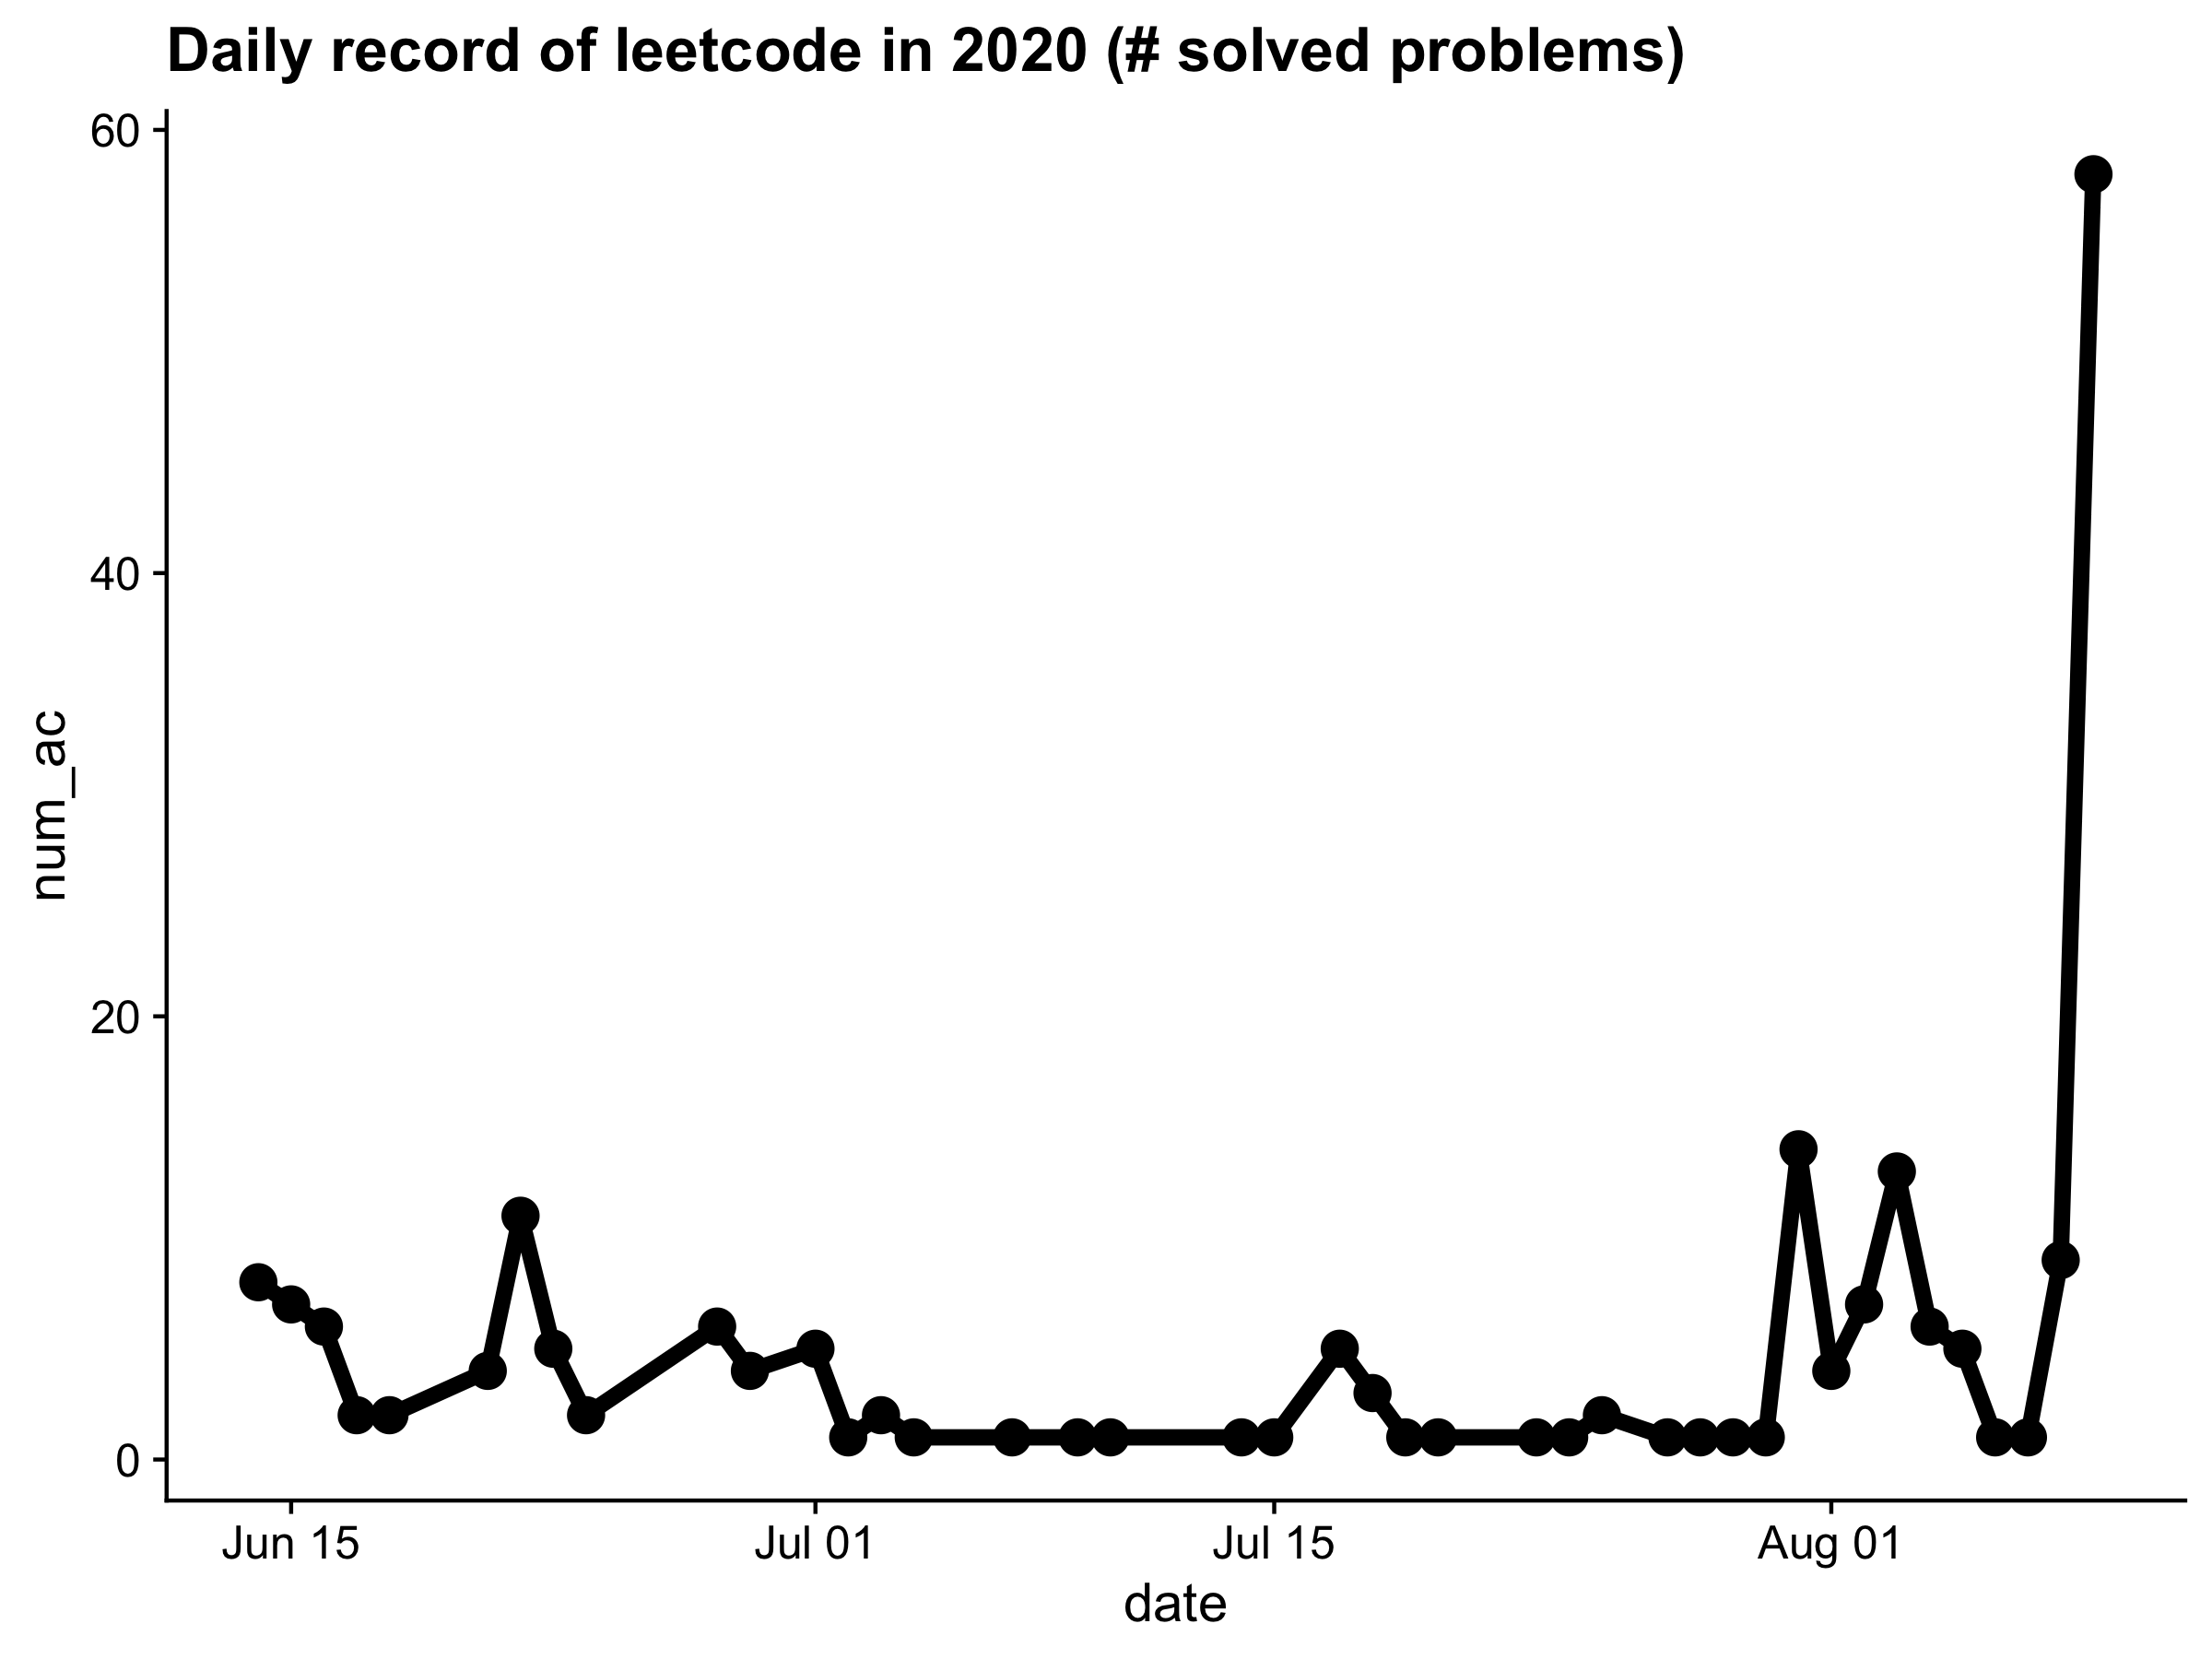

In [5]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)

df_unique_ac %>%
    mutate(date=as_datetime(timestamp)) %>% 
    filter(date>="2020-01-01") %>%
    mutate(date=date(date))  %>% 
    group_by(date)  %>% 
    summarise(num_ac = n()) %>% 
    ggplot(aes(x=date,y=num_ac)) +
    geom_point(size=4) +
    geom_path(size=2) +
    ggtitle("Daily record of leetcode in 2020 (# solved problems)")

In [6]:
df_try_but_failed <-
    df %>% 
    mutate(solved=as.integer(status_display == "Accepted")) %>% 
    group_by(title) %>% 
    summarise(solved=sum(solved),ntries=n()) %>% 
    ungroup() %>% 
    filter(!solved)
df_try_but_failed

`summarise()` ungrouping output (override with `.groups` argument)



title,solved,ntries
<chr>,<int>,<int>
Can I Win,0,1


In [12]:
# check the number of submission per problem.
df_stat_per_problem <- df %>%
    filter(!(title %in% df_try_but_failed$title))  %>% 
    select(id, lang, status_display, title, timestamp)  %>% 
    left_join(df_unique_ac  %>% select(title, ac_id=id), by="title")  %>% 
    mutate(counted=id<=ac_id) %>% 
    filter(counted) %>% 
    group_by(title) %>% 
    summarise(n_try=n(),st_time=min(timestamp),ed_time=max(timestamp)) %>% 
    ungroup() %>% 
    mutate(st_time=as_datetime(st_time)) %>% 
    mutate(ed_time=as_datetime(ed_time)) %>% 
    mutate(min_took=as.numeric(ed_time-st_time)/60)  %>% 
    arrange(-min_took)
df_stat_per_problem

`summarise()` ungrouping output (override with `.groups` argument)



title,n_try,st_time,ed_time,min_took
<chr>,<int>,<dttm>,<dttm>,<dbl>
Max Chunks To Make Sorted II,3,2018-01-25 09:36:42,2020-06-21 21:17:07,1.265020e+06
Find First and Last Position of Element in Sorted Array,2,2018-03-15 20:58:38,2018-04-12 21:06:44,4.032810e+04
Spiral Matrix,4,2018-04-26 19:52:31,2018-05-03 10:04:38,9.492117e+03
Find the Duplicate Number,3,2018-03-12 02:31:54,2018-03-15 06:19:33,4.547650e+03
Container With Most Water,5,2020-06-15 18:39:15,2020-06-15 20:55:14,1.359833e+02
Max Chunks To Make Sorted,2,2018-01-25 08:01:54,2018-01-25 09:34:26,9.253333e+01
Parallel Courses II,3,2020-06-28 11:43:19,2020-06-28 13:13:34,9.025000e+01
Avoid Flood in The City,16,2020-06-21 08:41:05,2020-06-21 10:09:27,8.836667e+01
Longest Substring with At Least K Repeating Characters,4,2018-04-20 03:42:39,2018-04-20 05:07:16,8.461667e+01


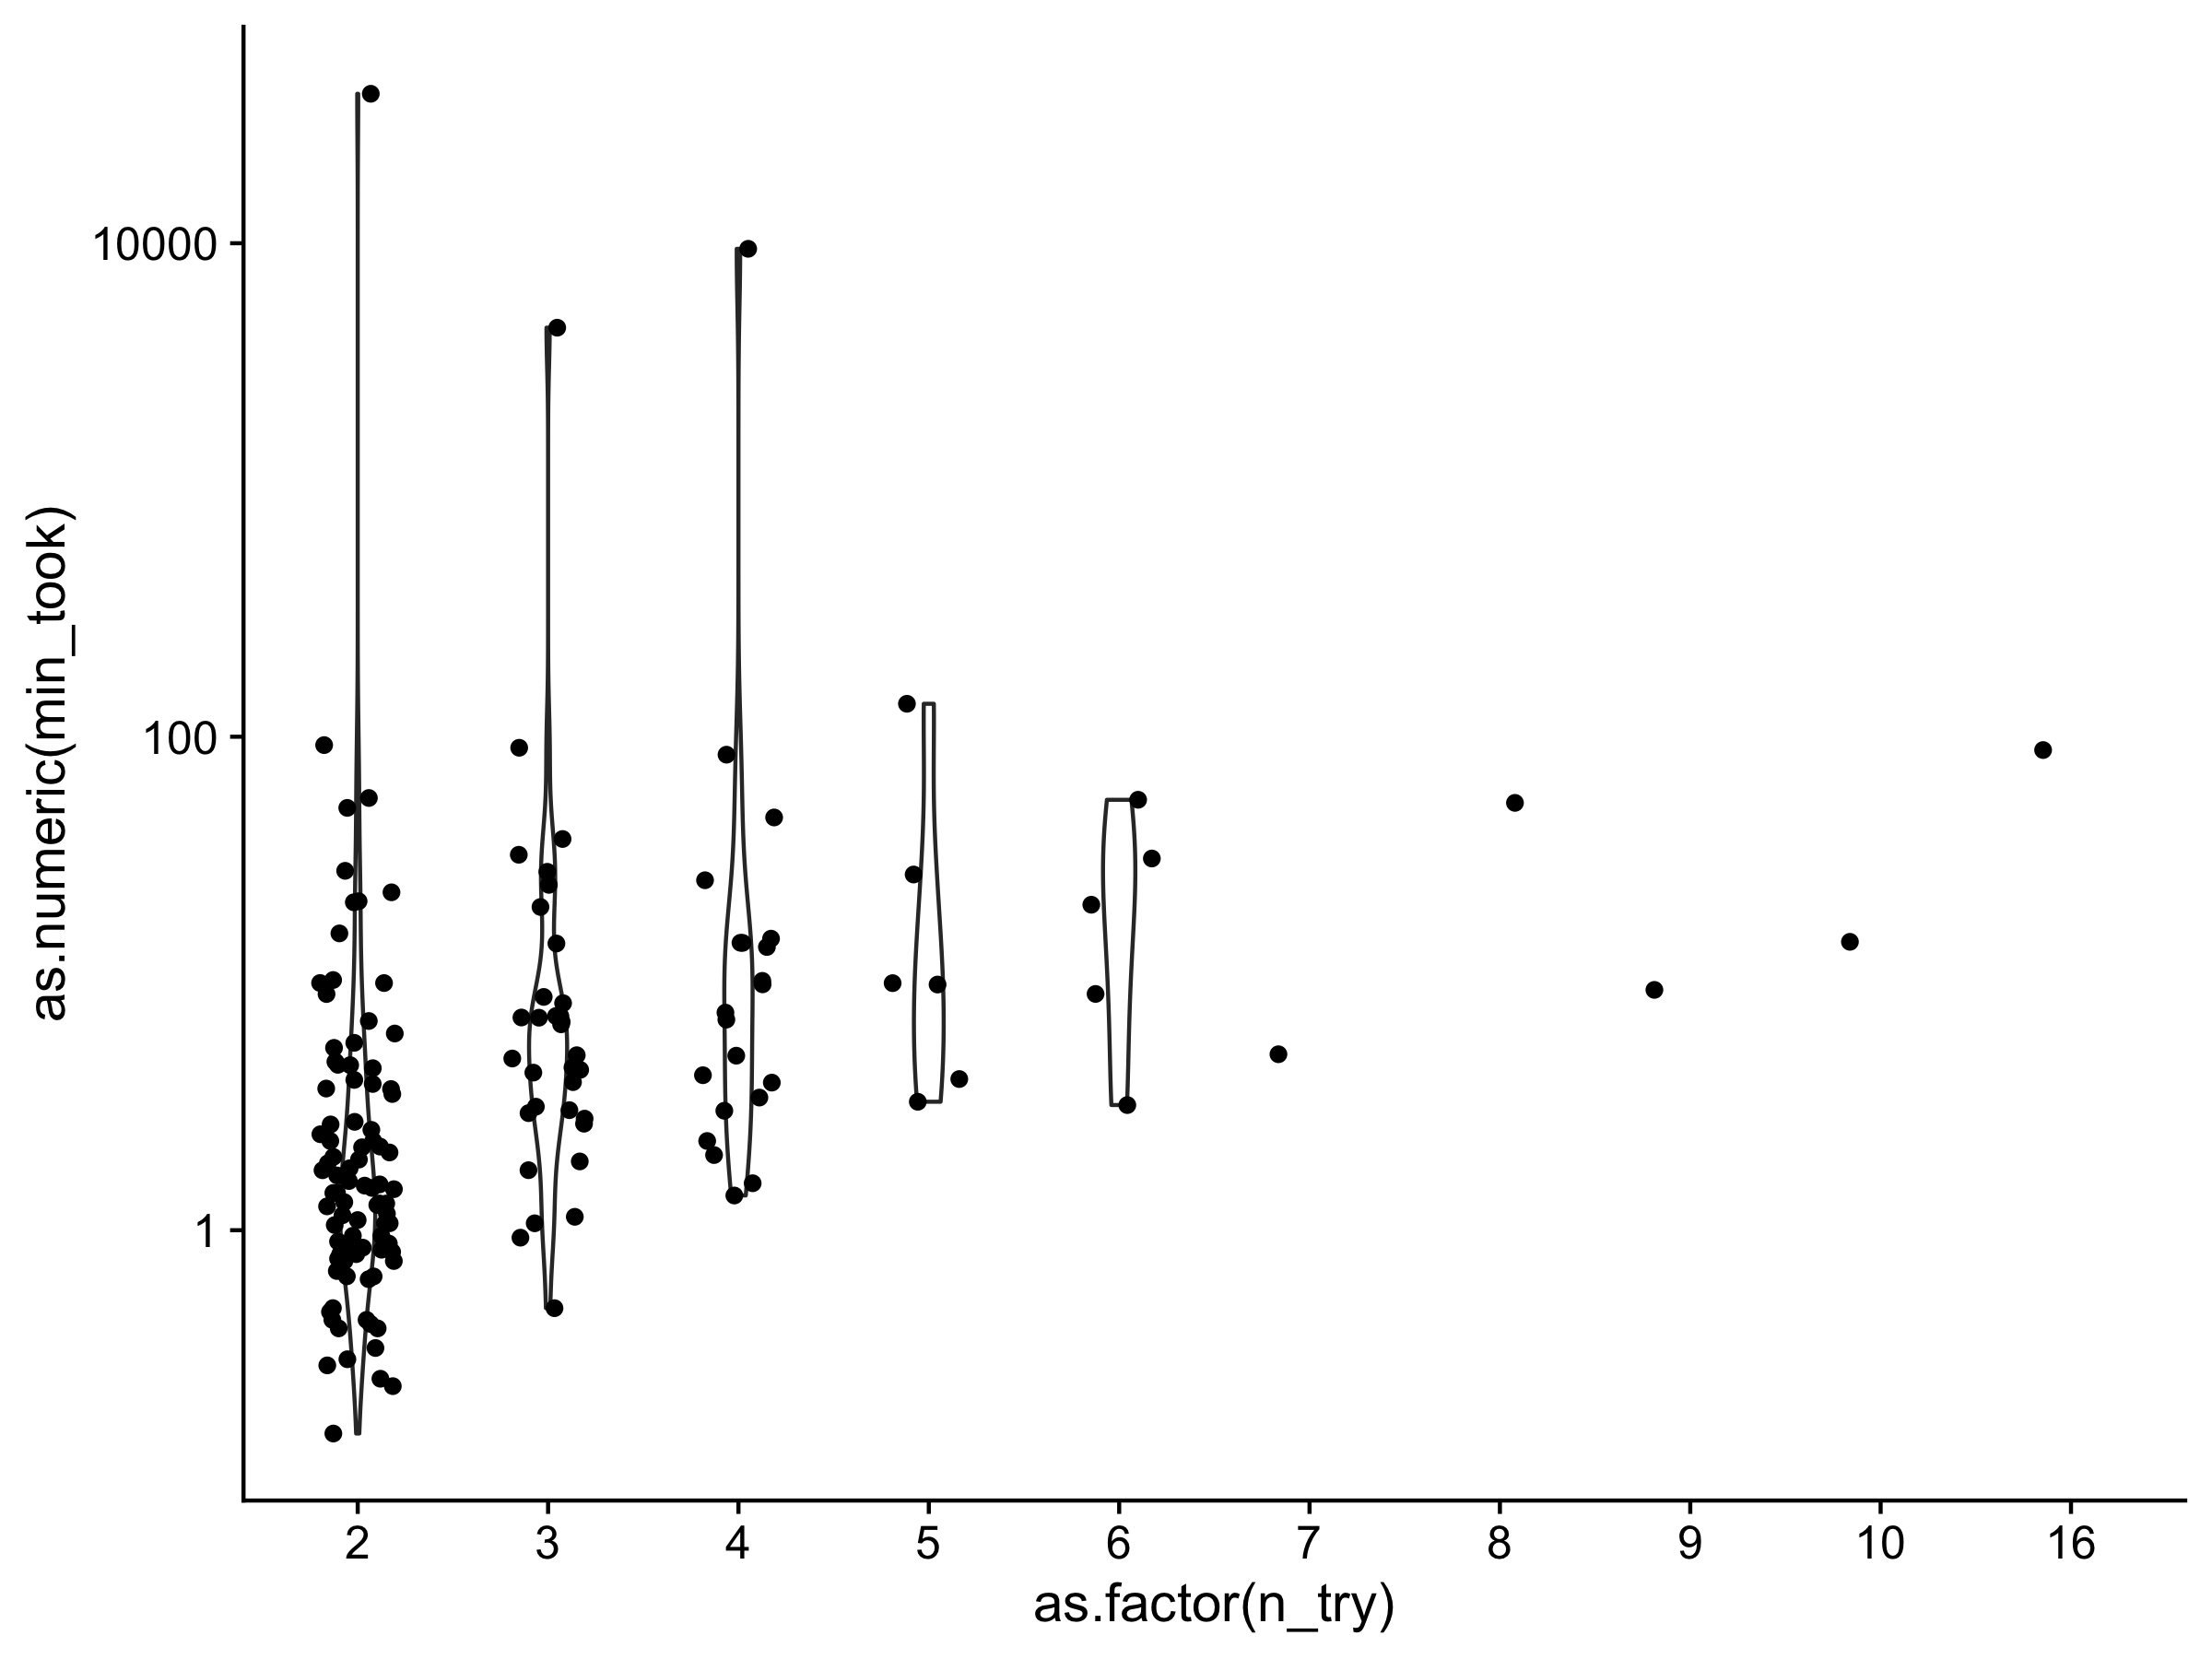

In [20]:
df_stat_per_problem %>% 
    filter(as.numeric(min_took)<=1e5) %>% 
    filter(n_try>1) %>% 
    ggplot(aes(x=as.factor(n_try),y=as.numeric(min_took))) +
    geom_violin(width=0.2) +
    geom_jitter(width=0.2) +
    scale_y_log10() 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



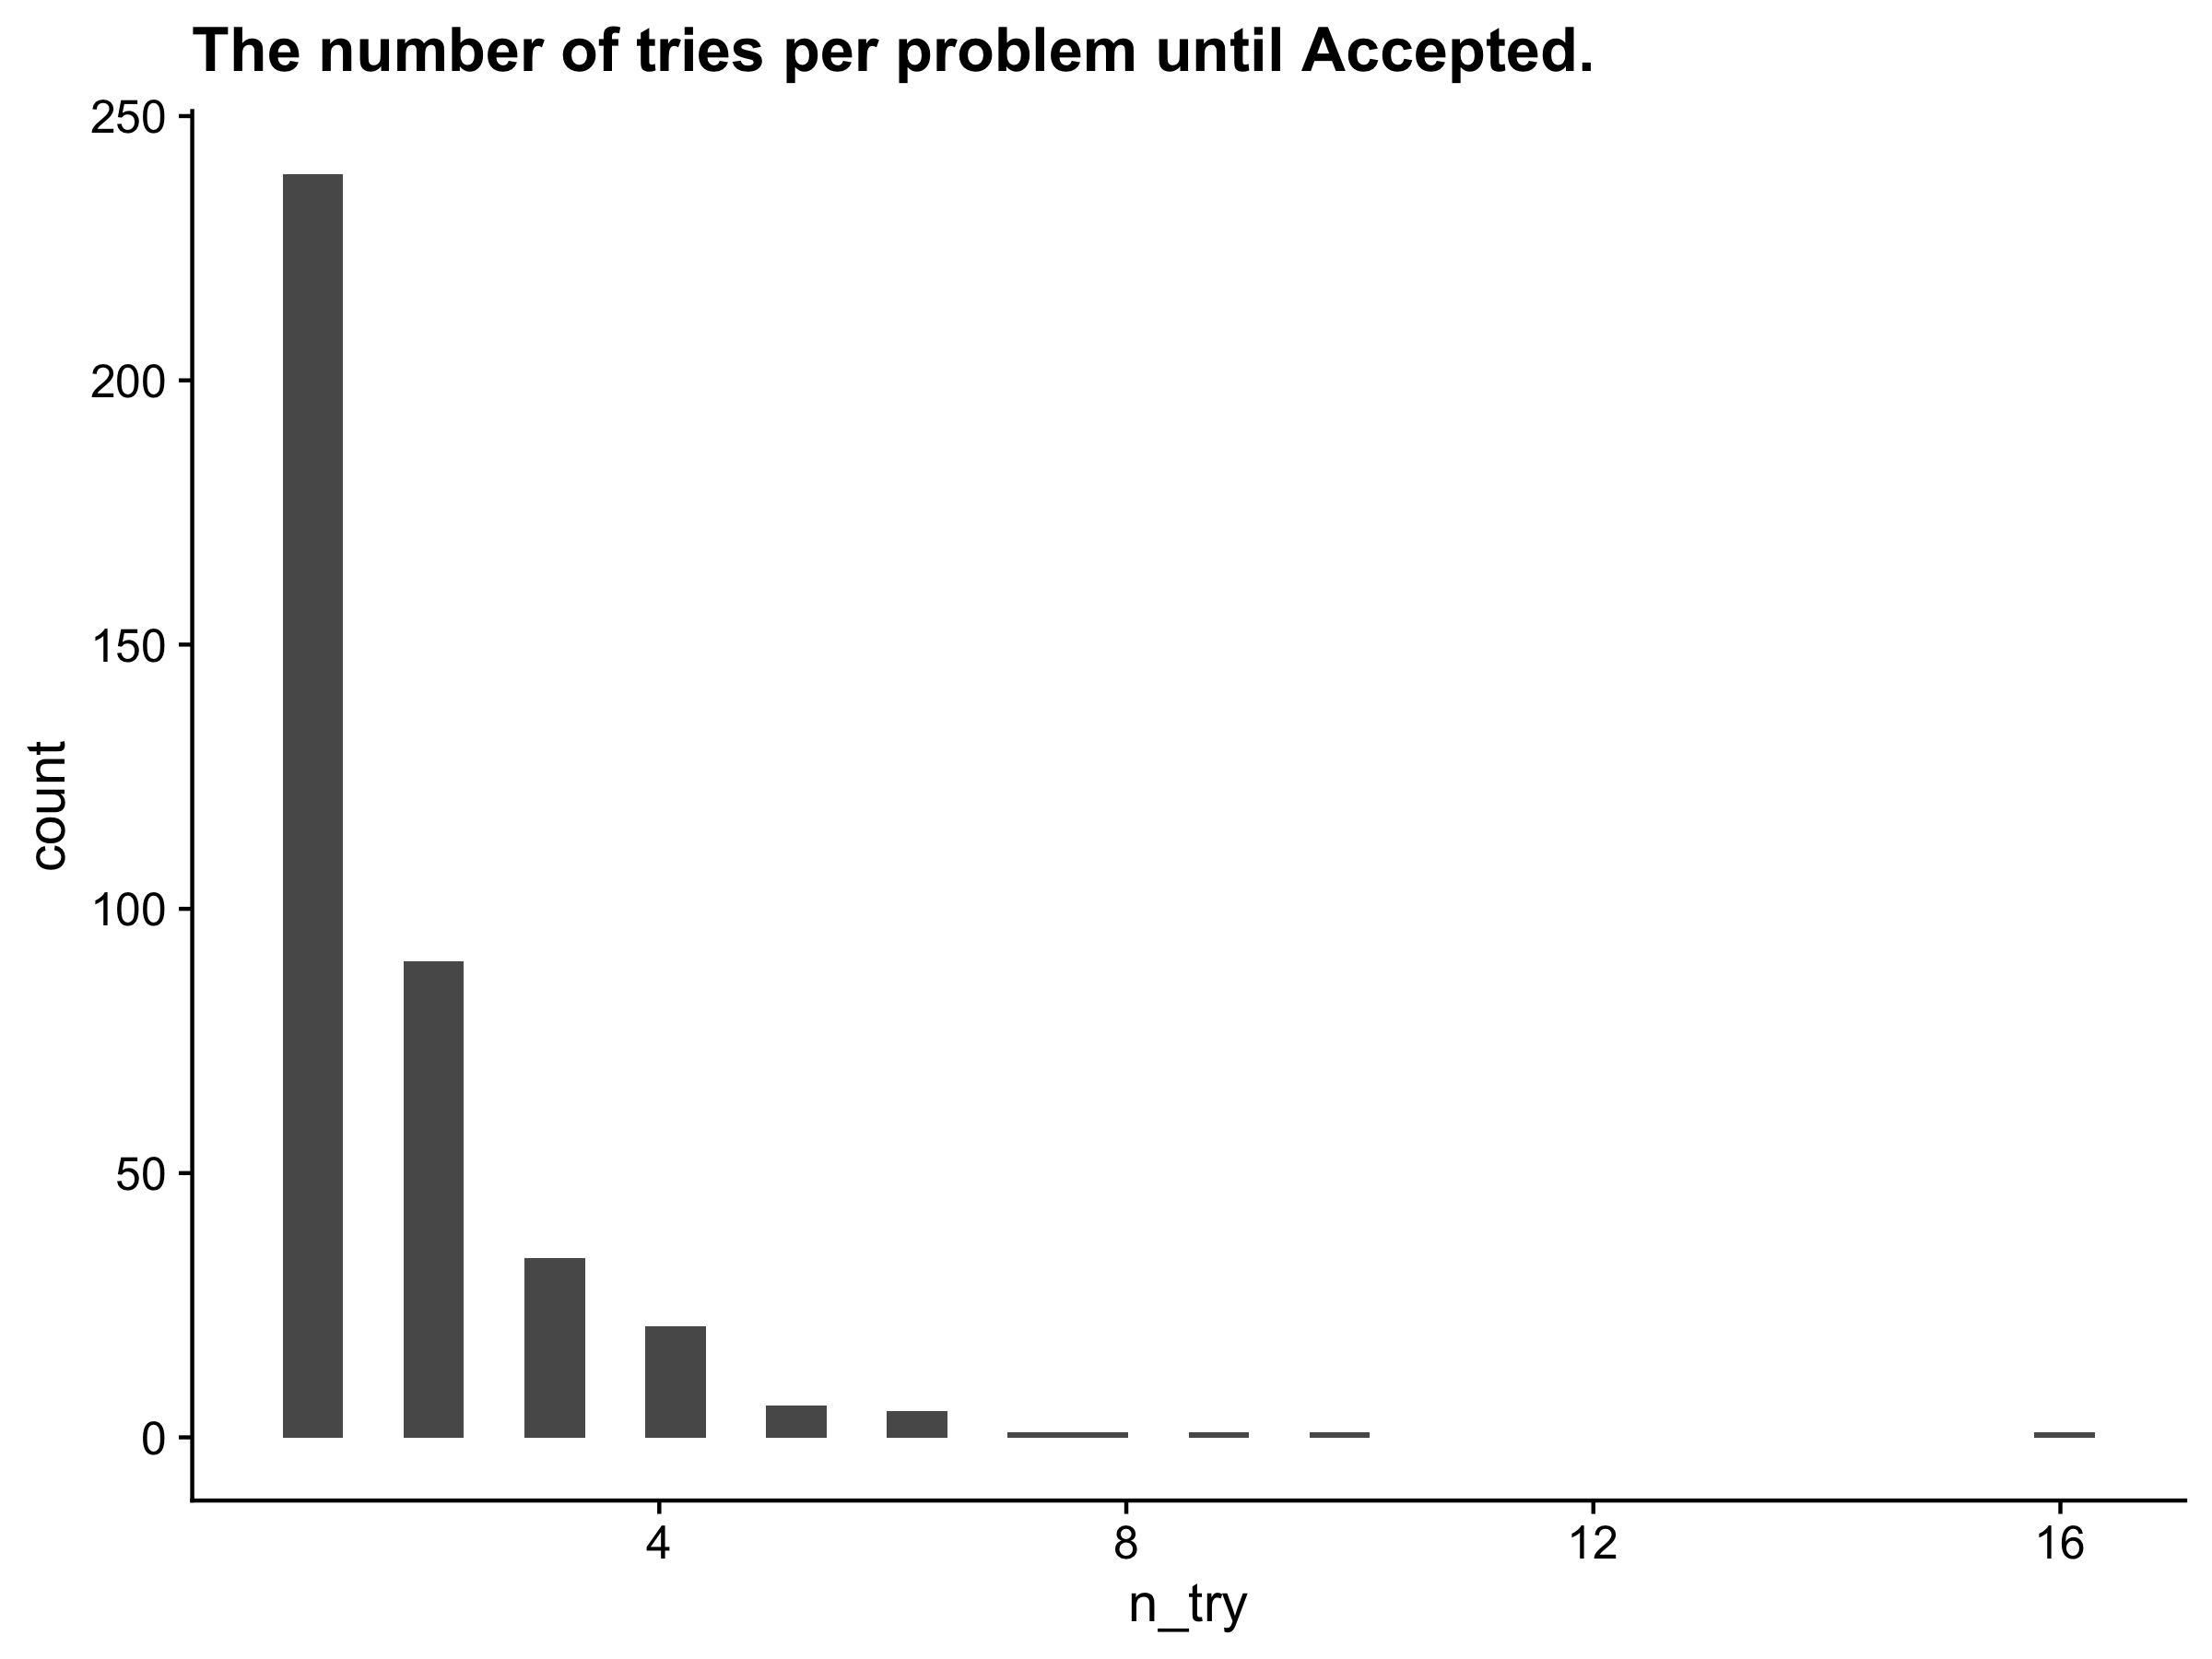

In [21]:
df_stat_per_problem %>% 
    ggplot(aes(n_try)) +
    geom_histogram() +
    ggtitle("The number of tries per problem until Accepted.")